In [64]:
%matplotlib notebook

from modsim import *

In [65]:
m = UNITS.meters
s = UNITS.seconds

In [66]:
import random

In [67]:
condition = Condition(floorheight = 3,
                     num_floors = 1,
                     v_max = .762,
                     a_max = .65)

In [68]:
# 18 seconds for elevator to start, 9 to stop, 13 between floors

In [69]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [70]:
find_magic_num(condition.v_max, condition.a_max)

1.3399476923076923

In [125]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0, vy = 0)
    ts = linspace(0,50,1001)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [126]:
system = make_system(condition)
system.finished

False

In [127]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if (t < 18):
        return vy,0
    if(t > end_time):
        return vy,0
    if(y > 2):
        ay = -a_max 
        return vy, ay
    ##if(y> height):
      #  system.end_time = t
    if(vy > v_max):
        ay = 0
        
    return vy,ay

In [128]:
system.magic_num

1.3399476923076923

In [129]:
system.end_time = 1000
run_odeint(system, slope_func)

In [130]:
plot(system.results.y)
system.height
title("Trajectory Over One Floor")
xlabel("Time (S)")
ylabel("Height (M)")

<IPython.core.display.Javascript object>


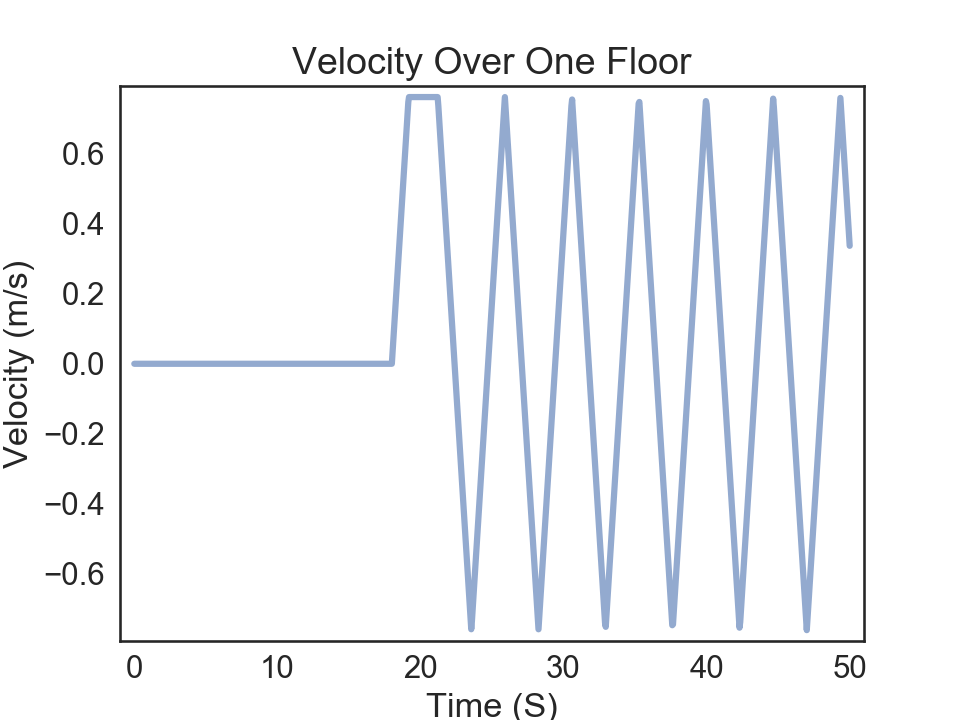

Saving figure to file velocity1


In [131]:
newfig()
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Velocity (m/s)")
savefig('velocity1')

In [153]:
def find_end_time(system):
    t = 1000000
    for i in range(1000):
        if(system.results.y[i * .05] >= system.results.y.max() - .1):
            t = i * .05
            print(t)
            break
    for j in range(1001):
        if(j > t / .05):
            system.results.vy[j *.05] = 0
            system.results.y[j * .05] = system.results.y.max()

In [154]:
run_odeint(system, slope_func)
system.results.y.max()

2.4466483710685405

In [155]:
run_odeint(system, slope_func)
find_end_time(system)

21.85


<IPython.core.display.Javascript object>


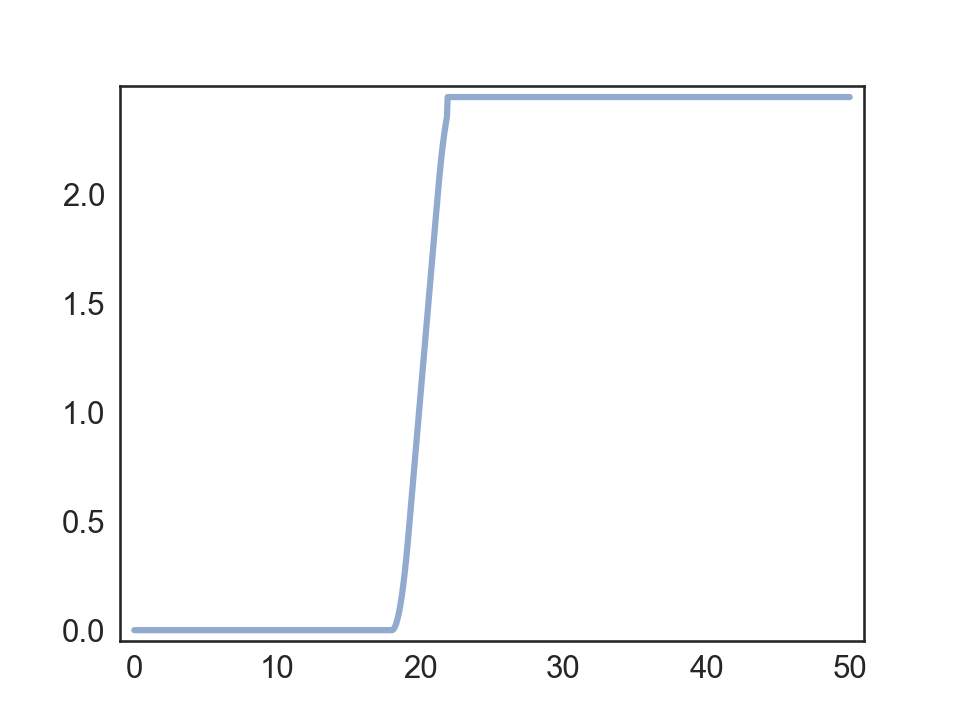

In [156]:
newfig()
plot(system.results.y)

In [546]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += system.end_time + 13
    total_time += 14
    return total_time
        

In [547]:
def sweep_basic_floors(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        condition = Condition(floorheight = 3 *m,
                     num_floors = i,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i + 1] = system.end_time + 27
    return sweep

In [548]:
sweep = sweep_basic_floors(10)

In [549]:
def sweep_3_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [550]:
def sweep_7_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [551]:
sweep2 = sweep_3_people(10)

In [552]:
print(sweep)

0      0
1     27
2     27
3     27
4     27
5     27
6     27
7     27
8     27
9     27
10    27
dtype: int64


In [553]:
def walking(max):
    sweep = SweepSeries()
    for i in range(max + 1):
        sweep[i] = 18.75* i
    return sweep

In [554]:
sweep = sweep_basic_floors(5)
sweep2 = sweep_3_people(5)
sweep4 = walking(5)
sweep3 = sweep_7_people(5)


<IPython.core.display.Javascript object>


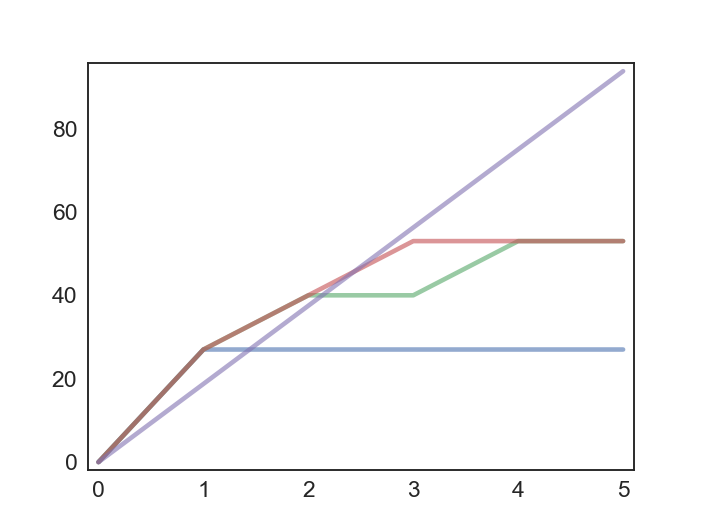

In [558]:
plot(sweep, label = '1 Person in Elevator')
plot(sweep2, label = '3 People in Elevator')
plot(sweep3, label = '7 People in Elevator')
plot(sweep4, label = 'walking')
